**Bacharelado em Engenharia de Computação**

**Discente:** Paulo Guilherme Silva de Araújo - **Turma B**

* **Antes de começar o Projeto é necessário importar as biblíotecas necessárias para realizar as tarefas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Preparação dos dados para a análise

>**(a)** Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos
registros policiais estão catalogados;

Para realizar essa importação, irei usar o comando `pd.read_csv` já usado frequentemente e verificar se há a necessidade de alterar algum parâmetro.

In [2]:
police = pd.read_csv('police.csv')
police

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


Através do comando `pd.info` é possível saber as linhas (registros policiais) e as colunas (variáveis)

In [3]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

O `pd.info()` mostrou que há 91741 ocorrências policiais e 15 variáveis.

>**(b)** Conte o número de dados faltosos de cada variável;

Utilizando os comandos `pd.isna()` para filtrar os dados faltosos e o `pd.count()` para contá-los, é possível ter esse resultado.

In [4]:
police.isna().count()

state                 91741
stop_date             91741
stop_time             91741
county_name           91741
driver_gender         91741
driver_race           91741
violation_raw         91741
violation             91741
search_conducted      91741
search_type           91741
stop_outcome          91741
is_arrested           91741
stop_duration         91741
drugs_related_stop    91741
district              91741
dtype: int64

O comando retornou 91741 dados faltosos para cada uma das variáveis do dataframe.

>**(c)** Como estamos trabalhando somente com dados de um único estado, não faz sentido
mantermos informações de variáveis como county_name e state. Exclua essas variáveis
do conjunto;

Usando o comando `pd.drop()` conseguimos remover tanto linhas como colunas de um dataframe. Nesse caso, as colunas `county_name` e `state` serão excluídas. O argumento `inplace=True` foi utilizado para que as mudanças ocorram no dataframe original.

In [5]:
police.drop(police[['county_name','state']], axis=1, inplace=True)

>**(d)** Durante as análises, a coluna driver_gender será crítica para muitas de suas análises.
Como apenas uma pequena fração das linhas está faltando driver_gender, remova
essas linhas do conjunto de dados;

Usando o comando `pd.dropna()` é possível remover os dados faltosos de um dataframe inteiro ou de apenas algumas colunas.

In [6]:
police['driver_gender'].dropna(inplace=True)

>**(e)** Vá na descrição dos dados e verifique que tipo de variável são search_conducted,
is_arrested e district; depois compare com os tipos de dados que estão armazena-
dos no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados
para essas variáveis;

Usando o comando `pd.info()` obtêm-se esse esse resultado

In [7]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           91741 non-null  object
 1   stop_time           91741 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86539 non-null  object
 4   violation_raw       86539 non-null  object
 5   violation           86539 non-null  object
 6   search_conducted    91741 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86539 non-null  object
 9   is_arrested         86539 non-null  object
 10  stop_duration       86539 non-null  object
 11  drugs_related_stop  91741 non-null  bool  
 12  district            91741 non-null  object
dtypes: bool(2), object(11)
memory usage: 7.9+ MB


`search_conducted` é do tipo `bool`. Já `is_arrested` e `district` são do tipo object. Para mudar o tipo da coluna `search_conducted` o comando `pd.astype()` será usado.

In [8]:
police['search_conducted'].astype('object')

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: search_conducted, Length: 91741, dtype: object

>**(f)** A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas: stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeandoa como stop_datetime e converta no formato data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;

Os comandos `pd.join()` junto com o comando `pd.apply()` serão usados para juntar as duas colunas e aplicar essa modificação ao dataframe, respectivamente.

In [9]:
police['stop_datetime'] = police[['stop_date', 'stop_time']].apply(' '.join, axis=1)

>**(g)** Por fim, transforme a coluna stop_datetime no índice do dataframe.

Para transformar uma coluna em index, basta usar o comando `pd.set_index()`

In [10]:
police.set_index('stop_datetime', inplace=True)

#### 2. Análise do gênero sobre as infrações

>**(a)** Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os motoristas para obter uma compreensão básica dos dados. Construa uma distribuição de frequências da variável violation e responda: qual a infração mais comum e a menos notificada?

Usando o comando `value_counts()` é possível obter esse resultado.

In [11]:
police['violation'].value_counts()

Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

O resultado da operação mostra que a infração mais e menos comum são, respectivamente, `Speeding` e `Seat belt`.

>**(b)** O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela de contingência para frequência absoluta e outra para frequência relativa, contendo a distribuição conjunta das variáveis driver_gender e violation.

Para realizar essa operação irei usar também o `sort_index` para organizar os indices, junto com o parâmetro `ascending=False` para mostrá-los de forma decrescente. Após isso usei o `pd.concat()` para juntar as duas frequências em um dataframe único.

In [12]:
fi=police[['violation','driver_gender']].value_counts()
fr=police[['violation','driver_gender']].value_counts(normalize=True)

In [13]:
fi=fi.sort_index(ascending=False)
fr=(fr*100).sort_index(ascending=False)

In [14]:
dist = pd.concat([fi,fr],axis=1)
dist.columns = ['fi', 'fr']
dist

fi         fr
violation           driver_gender                  
Speeding            M              32777  37.876722
                    F              15646  18.080337
Seat belt           M               2278   2.632430
                    F                578   0.667930
Registration/plates M               2647   3.058843
                    F               1056   1.220301
Other               M               3702   4.277988
                    F                707   0.817001
Moving violation    M              12938  14.951003
                    F               3286   3.797264
Equipment           M               8420   9.730055
                    F               2501   2.890127

O resultado mostrou que a maior incidência de acidentes é de maioria do sexo masculino para todas as infrações. A infração que o sexo masculino e o sexo feminino mais cometem é `Speeding`. Entretanto, em se tratando de outras violações, o sexo masculino tende a cometer muito mais `Moving violation` que o feminino.

>**(c)** Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;

Irei usar o `plot.bar()` do `matplotlib` para gerar o gráfico de barra e, como argumento, o `subplots=True` para separar os gráficos.

array([<AxesSubplot:title={'center':'fi'}, xlabel='violation,driver_gender'>,
       <AxesSubplot:title={'center':'fr'}, xlabel='violation,driver_gender'>],
      dtype=object)

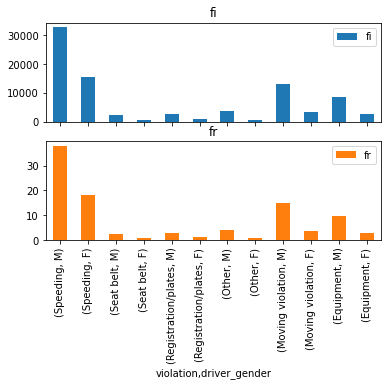

In [15]:
dist.plot.bar(subplots=True)

>**(d)** Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma tabela de contingência considerando as variáveis driver_gender e stop_outcome e então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um "Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);

Usando o mesmo procedimento da letra B, obtêm-se esse resultado:

In [16]:
fi2=police[['stop_outcome','driver_gender']].value_counts()
fr2=police[['stop_outcome','driver_gender']].value_counts(normalize=True)

In [17]:
fi2=fi2.sort_index(ascending=False)
fr2=(fr2*100).sort_index(ascending=False)

In [18]:
dist2 = pd.concat([fi2,fr2],axis=1)
dist2.columns = ['fi', 'fr']
dist2

fi         fr
stop_outcome     driver_gender                  
Warning          M               3651   4.219053
                 F               1485   1.716049
No Action        M                423   0.488814
                 F                201   0.232273
N/D              M                439   0.507303
                 F                168   0.194139
Citation         M              55840  64.528058
                 F              21251  24.557410
Arrest Passenger M                230   0.265785
                 F                113   0.130581
Arrest Driver    M               2179   2.518027
                 F                556   0.642507

As distribuições de frequência mostram que o sexo masculino tem maioria, tanto em `Warning` quanto em `Citation`. Reforçando que a diferença entre sexo masculino e o feminino é muito maior na `Citation`.

>**(e)** O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta, primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em uma revista de veículo;

Para verfificar essa pergunta, iriei juntar e somar os valores das colunas `search_conducted` e `driver_gender`

In [19]:
d3=police[['search_conducted','driver_gender']].astype('object').value_counts()

In [20]:
d3=d3.sort_index(ascending=False)

In [21]:
d3

search_conducted  driver_gender
True              M                 2851
                  F                  456
False             M                59911
                  F                23318
dtype: int64

O resultado mostra que o gênero que mais teve revistas foi o gênero masculino. Além disso, pode-se notar a diferença entre os dois gêneros, que é considerável.

>**(f)** Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo
separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo
tempo usando groupby;

Poderia usar o groupby, mas como eu já havia criado um DF com as informações separadas, resolvi fazer a soma para conseguir as porcentagéns

In [22]:
tax = d3[1]
tax.sum()

3307

In [23]:
M = d3[1][0]
M

2851

In [24]:
F = d3[1][1]
F

456

In [25]:
taxM = M * 100/tax.sum()
taxM

86.21106743271848

In [26]:
taxF = F * 100/tax.sum()
taxF

13.788932567281524

O cálculo resultou uma taxa de revista de 86.21% para o sexo Masculino e 13.78% para o sexo Feminíno

>**(g)**  Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?

Utilizando a mesma técnica com `pd.value_counts()` das duas caregorias necessárias: `violation` e `drive_gender` é possível ter a porcentagem de cada infração pra Homens e Mulheres.

In [27]:
tr1=police[['violation','driver_gender', 'search_conducted']].value_counts(normalize=True)

In [28]:
tr1=(tr1*100).sort_index(ascending=False)
tr1

violation            driver_gender  search_conducted
Speeding             M              True                 1.056208
                                    False               36.820514
                     F              True                 0.150226
                                    False               17.930110
Seat belt            M              True                 0.092447
                                    False                2.539983
                     F              True                 0.011556
                                    False                0.656374
Registration/plates  M              True                 0.332809
                                    False                2.726033
                     F              True                 0.067024
                                    False                1.153277
Other                M              True                 0.197606
                                    False                4.080383
                     F 

O resultado mostrou que para a maioria das violações, os homens são os mais revistados.

#### 3. Análise exploratória visual dos dados

>**(a)**  Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em todas as paradas no DataFrame, calculando a média da coluna is_arrested;

Para calcular a média, pode-se usar o comando `pd.mean()`.

In [29]:
police['is_arrested'].mean(numeric_only=False)

0.03556777868937704

>**(b)**  Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice. A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso, agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate com os valores encontrados da taxa de prisão por hora;

Para realizar essa tarefa, agrupei as duas variáveis a serem testadas com `pd.groupby` e realizei o cálculo da media em todas as linhas do DF resultante com `pd.agg`. Depois realizei operações de reset de index para juntar ao dataframe original.

In [30]:
hourly_arrest_rate= police[['stop_time', 'is_arrested']].groupby('stop_time').agg('mean', numeric_only=False)

In [31]:
hourly_arrest_rate.rename(columns={'is_arrested': 'hourly_arrest_rate'}, inplace=True)
hourly_arrest_rate.reset_index(inplace=True)

In [32]:
hourly_arrest_rate

,stop_time,hourly_arrest_rate
0,00:00,0.067073
1,00:01,0.032258
2,00:02,0.073171
3,00:03,0.037975
4,00:04,0.000000
...,...,...
1426,23:55,0.031008
1427,23:56,0.049383
1428,23:57,0.055556
1429,23:58,0.044118


In [33]:
hourly_arrest_rate['stop_time'] = pd.to_datetime(hourly_arrest_rate['stop_time'])

In [34]:
g1 = hourly_arrest_rate.groupby(hourly_arrest_rate['stop_time'].dt.hour)['hourly_arrest_rate'].sum()

In [35]:
g1

stop_time
0     3.039094
1     3.473651
2     3.432555
3     3.931334
4     2.682576
5     2.084524
6     0.670526
7     0.814473
8     1.374642
9     1.531018
10    1.689726
11    1.705517
12    2.323924
13    1.991299
14    1.848503
15    1.819935
16    2.185194
17    2.419172
18    2.280983
19    1.852416
20    2.309097
21    3.393110
22    2.638207
23    2.815631
Name: hourly_arrest_rate, dtype: float64

In [36]:
police2 = police.reset_index()

In [37]:
police2 = pd.concat([police2, g1], axis=1)

In [38]:
police2.set_index('stop_datetime', inplace=True)

In [39]:
police2

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,hourly_arrest_rate
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,3.039094
2005-01-23 23:15,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,3.473651
2005-02-17 04:15,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,3.432555
2005-02-20 17:15,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,3.931334
2005-02-24 01:20,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2.682576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,NaN
2015-12-31 21:59,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,NaN
2015-12-31 22:04,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,NaN


>**(c)** Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora do Dia;

Para realizar isso, usarei o `plot.bar` do `matplotlib`

<AxesSubplot:title={'center':'Taxa de Prisões por Hora do Dia'}, xlabel='stop_time'>

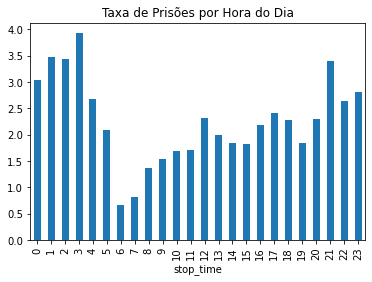

In [40]:
g1.plot.bar(x='stop_time', y='hourly_arrest_rate', title='Taxa de Prisões por Hora do Dia')

>**(d)** Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica se drogas foram encontradas durante uma determinada parada. Você calculará a taxa anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para visualizar como a taxa mudou ao longo do tempo;

Primeiro irei mudar a data que está em anos, meses e dias para apenas anos, para mostrar a taxa anual com o `pd.to_datetime()` e agrupar as datas com a coluna `drugs_related_stop` com o `pd.groupby()`. Para montar o gráfico, basta apenas usar o `plt.plot()`.

In [41]:
police['stop_date'] = pd.to_datetime(police['stop_date'])

In [42]:
Annual_drug_rate = police.groupby(police['stop_date'].dt.year)['drugs_related_stop'].sum()

<AxesSubplot:xlabel='stop_date'>

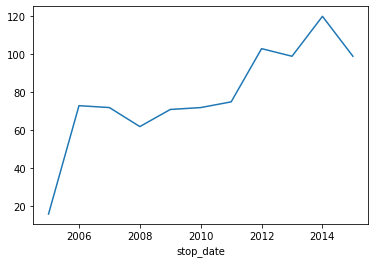

In [43]:
Annual_drug_rate.plot()

>**(e)** Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de
abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos. Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo. Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os dados desse resultado da concatenação;

Para realizar essa tarefa, pode-se empregar a mesma ideia da letra **d**. Entretanto, é preciso concatenar as duas taxas com `pd.concat` antes de gerar o gráfico.

In [44]:
Annual_search_rate = police.groupby(police['stop_date'].dt.year)['search_conducted'].sum()

In [45]:
Annual_search_rate

stop_date
2005    121
2006    420
2007    398
2008    333
2009    358
2010    320
2011    275
2012    349
2013    227
2014    276
2015    230
Name: search_conducted, dtype: int64

In [46]:
Annual_drugsearch_rate = pd.concat([Annual_drug_rate, Annual_search_rate], axis=1)

<AxesSubplot:xlabel='stop_date'>

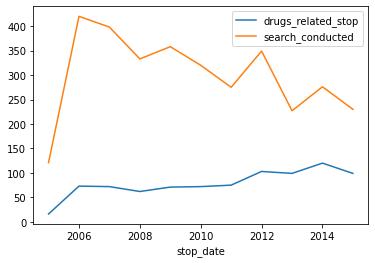

In [47]:
Annual_drugsearch_rate.plot()

O gráfico das duas variáveis mostra que o aumento ou a diminuição das apreensões de drogas não estão associadas ao aumento ou diminuição das abordagens políciais.

>**(f)** O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos como zonas. Como as zonas se comparam em termos de quais infrações são detectadas pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas ’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados obtido na tabela, e responda a questão colocada.

A lógica é a mesma da 2b, porém o gráfico será gerado com apenas uma parte do dataframe resultante: 'Zona K1' à 'Zona K3'

In [48]:
fi3=police[['district','violation']].value_counts()
fr3=police[['district','violation']].value_counts(normalize=True)

In [49]:
fi3=fi3.sort_index(ascending=False)
fr3=(fr3*100).sort_index(ascending=False)

In [50]:
dist3 = pd.concat([fi3,fr3],axis=1)
dist3.columns = ['fi', 'fr']
dist3

fi         fr
district violation                            
Zone X4  Speeding              9795  11.318596
         Seat belt              843   0.974127
         Registration/plates   1411   1.630479
         Other                 1560   1.802655
         Moving violation      5353   6.185650
         Equipment             3541   4.091797
Zone X3  Speeding              8779  10.144559
         Seat belt              820   0.947550
         Registration/plates    671   0.775373
         Other                  769   0.888617
         Moving violation      3086   3.566022
         Equipment             2049   2.367719
Zone X1  Speeding              1119   1.293059
         Seat belt               74   0.085511
         Registration/plates     38   0.043911
         Other                  143   0.165243
         Moving violation       671   0.775373
         Equipment              296   0.342042
Zone K3  Speeding             12323  14.239823
         Seat belt              638   0.737240
         Registration/plates    695   0.803106
         Other                  706   0.815817
         Moving violation      2898   3.348779
         Equipment             2302   2.660072
Zone K2  Speeding             10448  12.073169
         Seat belt              481   0.555819
         Registration/plates    768   0.887461
         Other                  942   1.088527
         Moving violation      2962   3.422734
         Equipment             2061   2.381585
Zone K1  Speeding              5960   6.887068
         Registration/plates    120   0.138666
         Other                  290   0.335109
         Moving violation      1254   1.449058
         Equipment              673   0.777684

array([<AxesSubplot:title={'center':'fi'}, xlabel='district,violation'>,
       <AxesSubplot:title={'center':'fr'}, xlabel='district,violation'>],
      dtype=object)

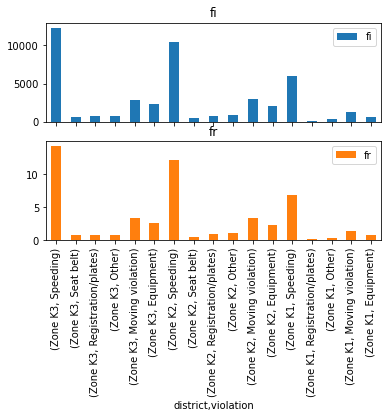

In [51]:
dist3.iloc[18:].plot.bar(subplots=True)

Através do gráfico é possível ver que para as 3 zonas, o tipo de violação mais frequente é o de excesso de velocidade.

#### 4. Analisando o efeito do clima no policiamento

* **Antes de começar a análise é necessário importar o dataframe necessário para realizar as tarefas**

In [52]:
weather = pd.read_csv('weather.csv')
weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>**(a)** Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as principais medidas resumo usando o comando describe e plote os três boxplots dessas variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se de que a temperatura é medida em graus Fahrenheit, não Celsius!

Para obter os valores para analisá-los, usarei o comando `pd.describe()`

In [53]:
temp = weather[['TMIN', 'TAVG', 'TMAX']].describe()
temp

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


In [54]:
temp2 = (temp - 32) * 5/9
temp2

,TMIN,TAVG,TMAX
count,2213.888889,658.333333,2213.888889
mean,6.380245,11.385009,16.260338
std,-8.322056,-7.871825,-7.666935
min,-20.555556,-14.444444,-9.444444
25%,-1.111111,3.888889,8.333333
50%,6.666667,12.222222,16.666667
75%,14.444444,20.000000,25.000000
max,25.000000,30.000000,38.888889


<AxesSubplot:>

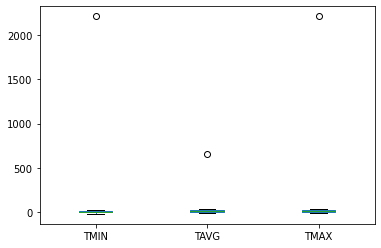

In [55]:
temp2.plot.box()

Considerando que os valores estão em °F, é necessário observá-los depois de convertê-los para °C. Ao observar a média das temperaturas em °C, é possível ver que a média das temperaturas são baixas e as mínimas chegam à valores abaixo de 0.

>**(b)** Para a variável TDIFF, que representa a diferença entre as temperaturas, apresente as medidas resumo e plote um histograma para essa variável. O que pode dizer sobre a distribuição de dados?

QUESTÃO DESCONDIDERADA - NÃO HÁ VARIVÁVEL TDIFF!

>**(c)**  Você agora preparará os DataFrames das abordagens de trânsito e de classificação do clima (o dessa sessão) para que estejam prontos para serem mesclados. No DataFrame sobre abordagens no trânsito, você transformará o índice stop_datetime para uma coluna (reset_index), pois o índice será perdido durante a mesclagem. Com o DataFrame meteorológico, selecione as colunas DATE e rating e coloque em um novo dataframe;

NÃO HÁ VARIÁVEL RATING. QUESTÃO SERÁ FEITA APENAS COM A COLUNA DATE.

Para filtrar a coluna que eu necessito, basta "chamá-la" usando a indexação: `df[coluna]`. O reset do index do dataframe foi feito com `pd.reset_index` e colocado em outra variável. Optei por essa decisão por pensar ser mais fácil trabalhar sem modificar o dataframe das questões anteriores.

In [56]:
police3 = police.reset_index()
police3

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17 04:15,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20 17:15,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24 01:20,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31 21:21,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31 21:59,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31 22:04,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31 22:09,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [57]:
date = weather[['DATE']]
date

,DATE
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
4012,2015-12-27
4013,2015-12-28
4014,2015-12-29
4015,2015-12-30


>**(d)** Agora, mescle os dataframes gerados em um novo dataframe, unidos usando a coluna stop_date de do dataframe policial e a coluna DATE do novo dataframe gerado a partir dos dados meteorológicos. Assim que a mesclagem for concluída, defina stop_datetime novamente como o índice;

Depois de seraparadas a coluna `DATE` do dataframe weather, juntei a coluna ao dataframe police com `pd.concat` Depois, `stop_datetime` foi transformado novamente em índice com `pd.set_index()`

In [58]:
police3 = pd.concat([police3, date], axis=1)

In [59]:
police3

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,DATE
0,2005-01-04 12:55,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-01
1,2005-01-23 23:15,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-02
2,2005-02-17 04:15,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-03
3,2005-02-20 17:15,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-01-04
4,2005-02-24 01:20,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31 21:21,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,NaN
91737,2015-12-31 21:59,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,NaN
91738,2015-12-31 22:04,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,NaN
91739,2015-12-31 22:09,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,NaN


In [60]:
police3.set_index('stop_datetime', inplace=True)

>**(e)** A partir desse novo dataframe criado, levante duas questões e as responda usando qualquer técnica que ache necessária.

Não é possível realizar essa questão pois seria necessária a variável `rating`, que não existe!